In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## COSC 757 Assignment 1
Working with the Algerian Forest Fires Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++


In [3]:
#Split CSV into two datasets based on region
bejaia_df = pd.read_csv("bejaia_fire.csv",skiprows=1)
sidibel_df = pd.read_csv("sidibel_fire.csv",skiprows=1)

#Merge them into one dataset with an additional region column
bejaia_df['Region'] = 'Bejaia'
sidibel_df['Region'] = 'Sidi-Bel Abbes'

fire_df = pd.concat([bejaia_df,sidibel_df],ignore_index=True)
fire_df.columns = fire_df.columns.str.strip()
fire_df['Classes'] = fire_df['Classes'].str.strip()
fire_df = fire_df.astype({'DC':'float64','FWI':'float64','Classes':'category','Region':'category'})

### Exploratory Data Analysis

In [4]:
fire_df.columns
#fire_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
fire_df['Classes'].unique()


['not fire', 'fire']
Categories (2, object): ['fire', 'not fire']

No handles with labels found to put in legend.
No handles with labels found to put in legend.


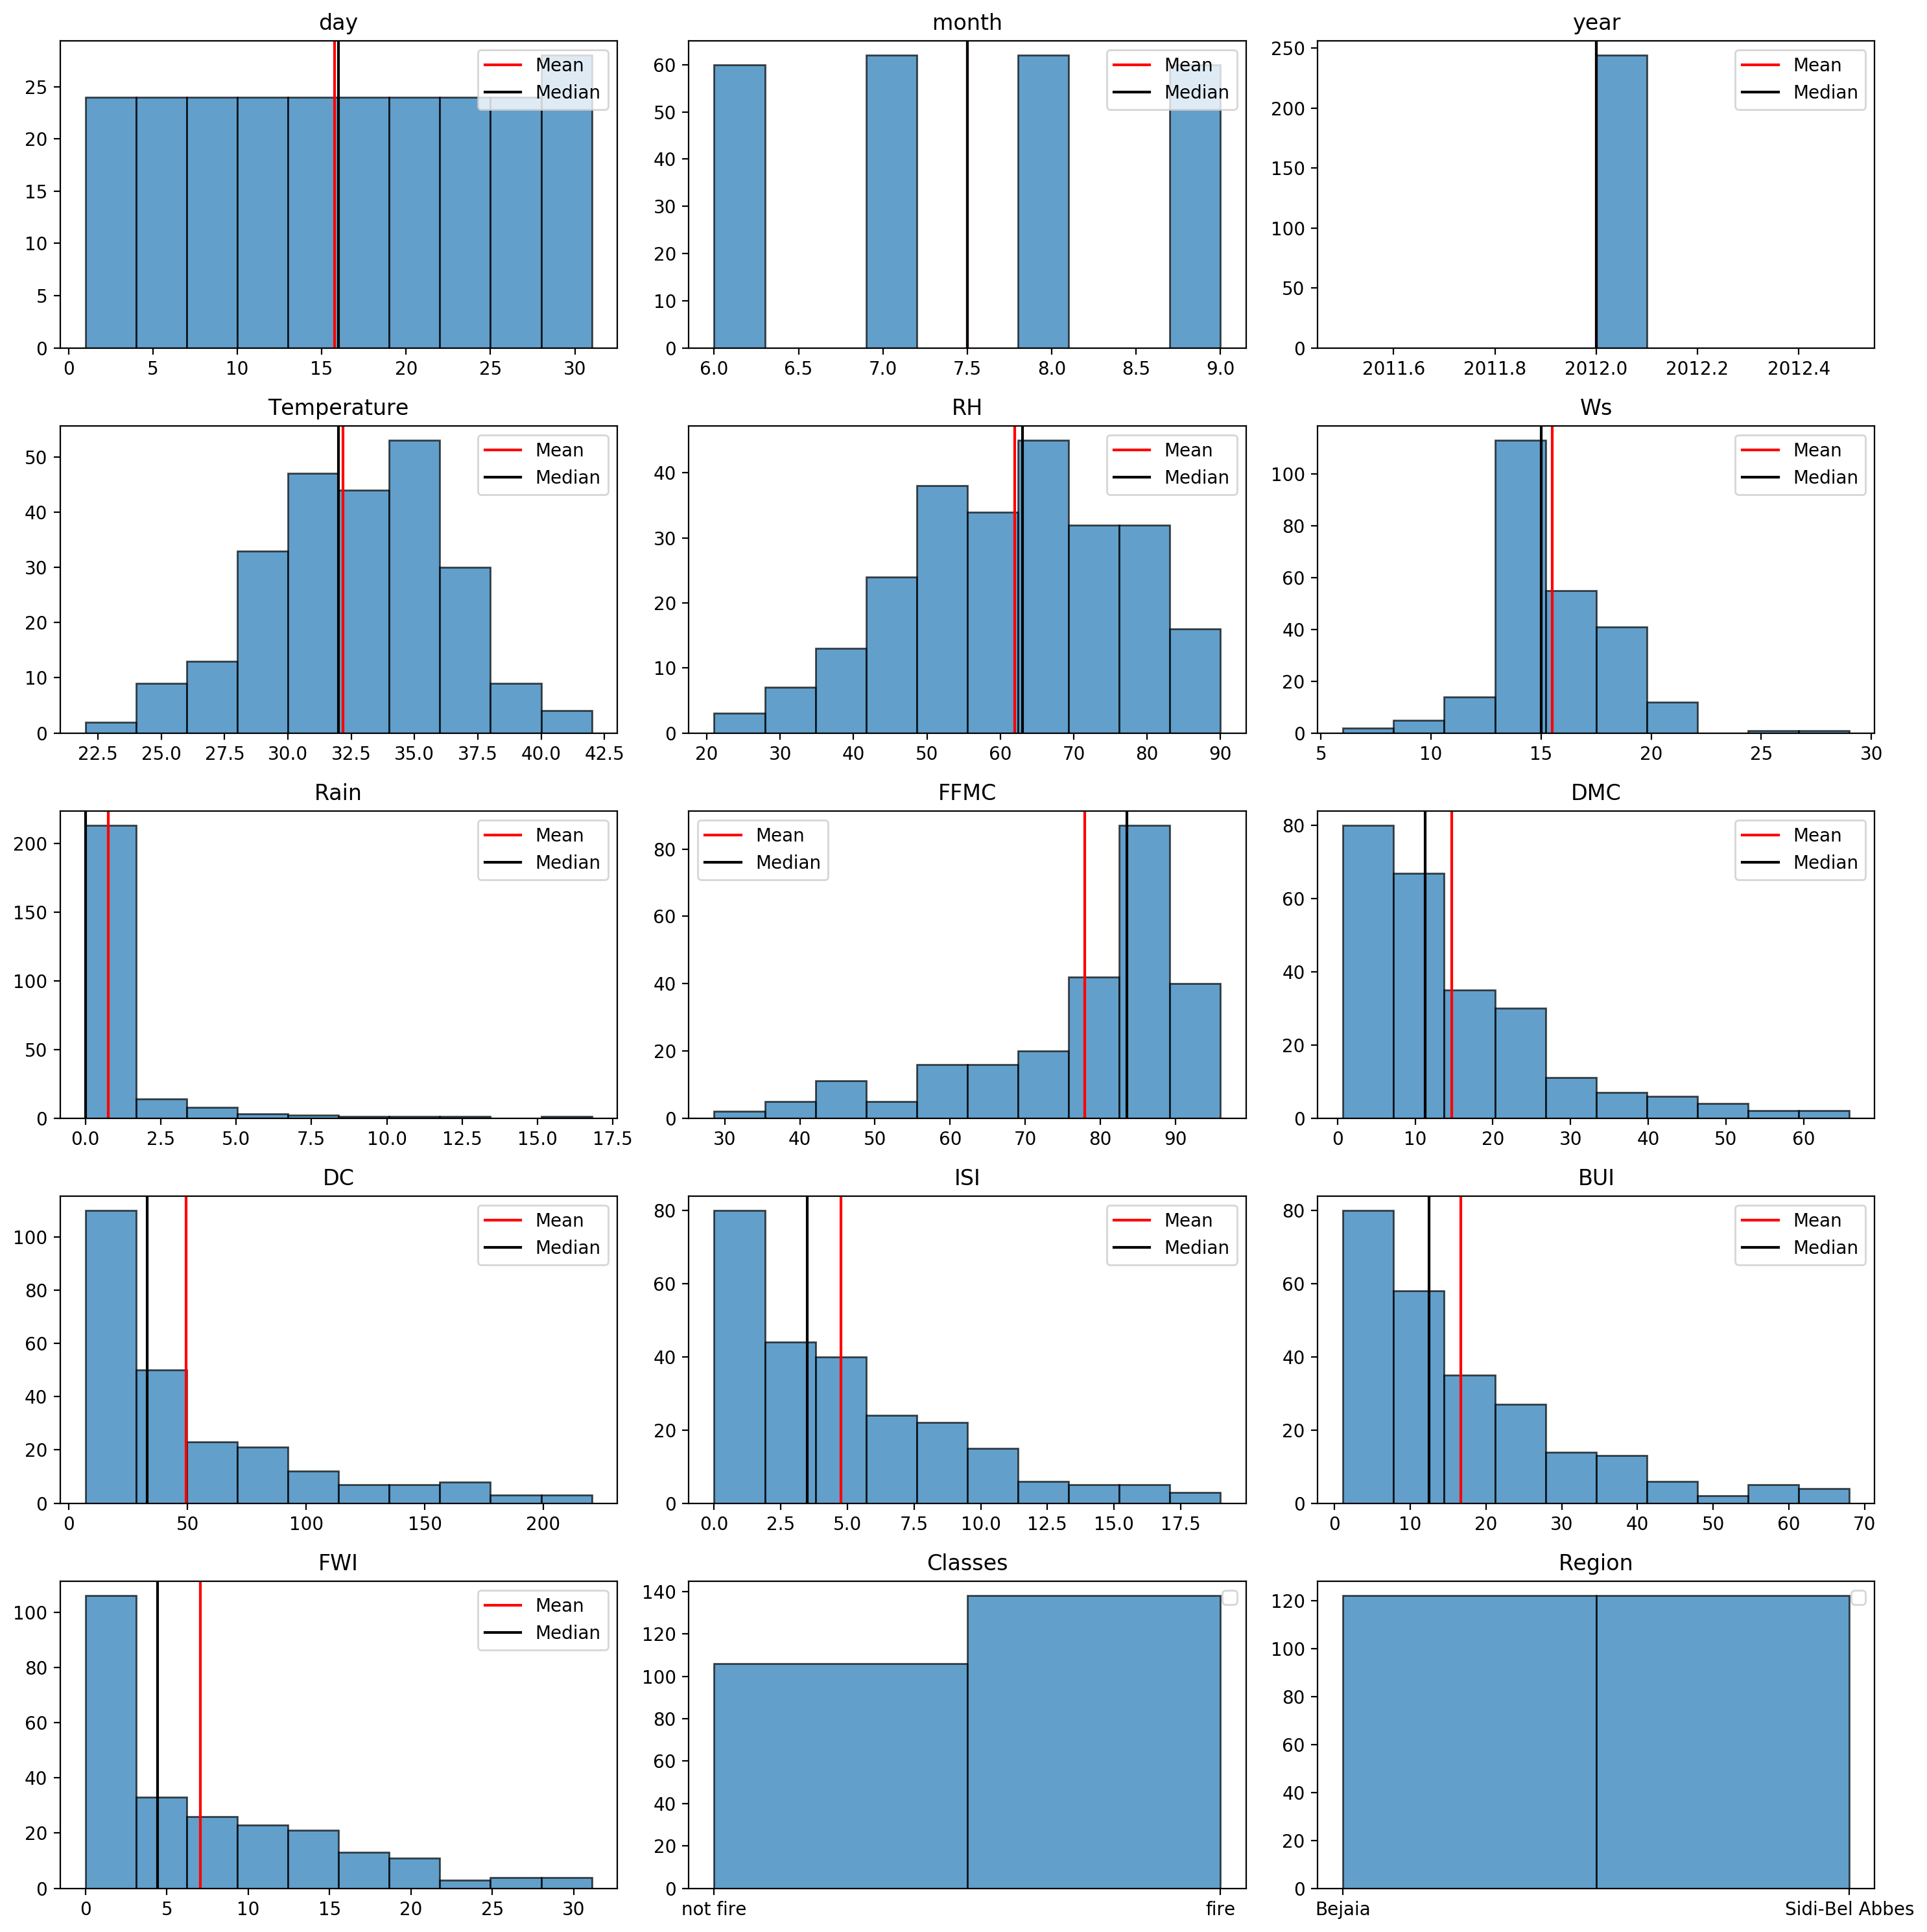

In [30]:
cols = np.array(fire_df.columns)
count=0

col_df = pd.DataFrame(columns=[['Column','Mean','Median', 'Standard Deviation', 'Min', 'Max']])

fig, ax = plt.subplots(5,3,figsize=(15,15),dpi=200)
for i,col in enumerate(ax):
    for j, row in enumerate(col):
        try:
            feature = fire_df[cols[count]]
            feature_arr = np.array(feature)
            #print(cols[count],np.mean(feature_arr))
            if (feature.dtype=='int64') or (feature.dtype=='float64'):
                col_df.loc[len(col_df.index)] = [cols[count], np.mean(feature_arr),np.median(feature_arr),np.std(feature_arr),min(feature_arr),max(feature_arr)]
            ax[i,j].set_title(cols[count])
            if feature.dtype.name == 'category':
                ax[i,j].hist(feature_arr,bins=len(feature.unique()),ec='k',alpha=0.7)
                
            else:
                ax[i,j].hist(feature_arr,ec='k',alpha=0.7)
                ax[i,j].axvline(np.mean(feature_arr),label='Mean',color='r')
                ax[i,j].axvline(np.median(feature_arr),label='Median',color='k')
            ax[i,j].legend()
            count+=1
        except IndexError:
            pass

plt.tight_layout()



In [19]:
col_df

,Column,Mean,Median,Standard Deviation,Min,Max
0,day,15.754098,16.00,8.806957,1,31
1,month,7.500000,7.50,1.110678,6,9
2,year,2012.000000,2012.00,0.000000,2012,2012
3,Temperature,32.172131,32.00,3.626389,22,42
4,RH,61.938525,63.00,14.853668,21,90
5,Ws,15.504098,15.00,2.804414,6,29
6,Rain,0.760656,0.00,1.995304,0.0,16.8
7,FFMC,77.887705,83.50,14.308160,28.6,96.0
8,DMC,14.673361,11.30,12.342668,0.7,65.9
9,DC,49.288115,33.10,47.521981,6.9,220.4


['not fire', 'fire']
Categories (2, object): ['fire', 'not fire']

### Data Preprocessing